In [1]:
# All the same from original sent bt Cherilyn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
import numpy as np

#to display multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# read/clean data
df1=pd.read_csv(r'Trading Analytics.csv')

#to clean all of the column names
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('&', '').str.replace('.', '').str.replace('?', '').str.replace('$', '').str.replace('%', '').str.replace('*', '').str.replace('=', '').str.replace('/', '').str.replace(':', '').str.replace('_', '').str.replace('-', '').str.replace('+', '')

# to remove columns
drop_cols = ['unnamed40','unnamed41', 'unnamed42', 'unnamed43', 'unnamed44', 'unnamed45', 'unnamed46','unnamed47','unnamed48', 'unnamed49', 'unnamed50','qualify','volume',
             'tradetime','eventtime','offer','bid','buyer','seller','buyerid','sellerid','rpertr','upertrq','unrealtot','1sthour','lasthour','1sthrusrtotvol','lasthusrtotvol',
             'range','p2p11','lnp2p1','volatstdevofln']
df1 = df1.drop(drop_cols, axis=1)

#to fix col that start with 1
df1.columns = df1.columns.str.replace('1', 'fir')

#to split ido into desk number and trader number
    # note trader number no longer has the C in the front
df1[['desk','trader']] = df1.ido.str.split("C",n=1,expand=True)

#to change the percentages into floats
df1['useroftotalvolu'] = df1['useroftotalvolu'].str.rstrip('%').astype('float') / 100.0
df1['firsthrusrfirsthrtot'] = df1['firsthrusrfirsthrtot'].str.rstrip('%').astype('float') / 100.0
df1['lasthusrlasthrtot'] = df1['lasthusrlasthrtot'].str.replace('#DIV/0!', 'NaN')
df1['lasthusrlasthrtot'] = df1['lasthusrlasthrtot'].str.rstrip('%').astype('float') / 100.0

df1['desk'] = df1['desk'].str.replace('S 10', 'S10').str.replace('TralS9', 'S9').str.replace('S37b08T', 'S3').str.replace('S3 ', 'S3')

df1.describe(include='all')

# read/clean survey data
df2 = pd.read_excel('Survey_clean.xlsx')

#to clean the column names
df2.columns = df2.columns.str.strip().str.replace(".","").str.replace("Unnamed: 1","Gender")

#to change IDo to ido so it matches the id column in df1 to make it easier to combine the dataframes; 
#I later learned that these could be combined without the column names being the same
df2.columns = df2.columns.str.replace('IDo', 'ido')

#to remove the row with the questions for analysis and to choose the desired questions
df2 = df2.iloc[1:]
df2 = df2[["ido","Gender","Q2","Q9","Q12","Q14","Q15","Q30"]]

#to split IDo into seperate columns for desk and trader
df2[['desk','trader']] = df2.ido.str.split("C",n=1,expand=True)

#to fix some of the desk names
df2['desk'] = df2['desk'].str.replace('S 10', 'S10').str.replace('S37b08T', 'S3').str.replace('S3 ', 'S3')

#to change the responses into a likert scale
df2['Q2'] = df2['Q2'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q9'] = df2['Q9'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q12'] = df2['Q12'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q14'] = df2['Q14'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q15'] = df2['Q15'].str.replace('Neither Agree nor Disagree', '3').str.replace('Strongly Disagree', '5').str.replace('Strongly Agree', '1').str.replace('Agree', '2').str.replace('Disagree', '4')
df2['Q30'] = df2['Q30'].str.replace('Yes', 'Y').str.replace('No', 'N')

#df2

df2.describe(include='all')

#create 1 dataframe
#combined along the IDo column; how as inner only inclued the rows that are common in both dataframes
data = pd.merge(df1, df2, on='ido', how='inner')

#removing the duplicate entries of desk and trader
data = data.drop(columns=['desk_x'])
data = data.drop(columns=['trader_x'])
#renaming the remaining desk and trader columns
data = data.rename(columns={'desk_y':'desk','trader_y':'trader'})

data.head()

,ido,price,realizedtot,unrealq,uservolu,useroftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,...,uservoltradedbuysell,Gender,Q2,Q9,Q12,Q14,Q15,Q30,desk,trader
0,S9C2015,21.0,-435.100000,20,310,0.092814,3340,21,1546,168,...,310,M,3,2,4,4,2,N,S9,2015
1,S9C1915,21.0,1109.200000,-53,165,0.060395,2732,18,788,0,...,165,M,3,2,4,4,2,N,S9,1915
2,S9C1615,21.0,17.799998,0,164,0.059399,2761,12,848,32,...,164,M,1,3,3,3,3,Y,S9,1615
3,S9C15TS,21.0,-1245.700090,58,882,0.251139,3512,58,1022,130,...,882,F,3,2,2,2,2,N,S9,15TS
4,S9C1515,21.0,-20.000000,0,200,0.071608,2793,16,828,20,...,200,M,3,2,2,2,2,N,S9,1515


# Lee

In [108]:
# Import survey data recoded in SPSS
import pyreadstat
# .SAV file loaded in
data_sav, meta = pyreadstat.read_sav('data_frame.sav')
data_sav.head(3)
#meta.column_labels # Variables from SPSS

# Pull up survey questions
meta_dict = dict(zip(meta.column_names, meta.column_labels))
meta_dict['Q2']
meta_dict['Q9']
meta_dict['Q12']
meta_dict['Q14']
meta_dict['Q15']
meta_dict['Q30']

,desk,trader,Gender,Q2,Q9,Q12,Q14,Q15,Q30
0,S6,14a1,F,1.0,3.0,2.0,3.0,2.0,Y
1,S6,12B1,F,5.0,1.0,3.0,4.0,1.0,N
2,S6,1514,M,1.0,4.0,3.0,3.0,1.0,N


'I traded using ALL of the information provided to me at each stage'

'I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information'

'The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions'

'The medium (news /blog /video/ tool based) of information impacted my trading decisions'

'I believe that more stock specific information could have helped me to increase my net profits'

'I have had prior experience in live trading stock /shares'

In [38]:
# Set up desks to cross tab each question
Q2_desks = pd.crosstab(data_sav['Q2'].\
        map(meta.variable_value_labels['Q2']), \
        data_sav['desk'].map(meta.variable_value_labels['desk']), \
        dropna=True, normalize='columns'). \
        loc[meta.variable_value_labels['Q2'].values()]. \
        loc[:,meta.variable_value_labels['desk'].values()]*100

Q30_desks = pd.crosstab(data_sav['Q30'].\
        map(meta.variable_value_labels['Q30']), \
        data_sav['desk'].map(meta.variable_value_labels['desk']), \
        dropna=True, normalize='columns'). \
        loc[meta.variable_value_labels['Q30'].values()]. \
        loc[:,meta.variable_value_labels['desk'].values()]*100

# Most popular response from each desk:
meta_dict['Q2']
Q2_desks # Focus is on S1, where Disagree was the most popular choice.

meta_dict['Q30']
Q30_desks # S1 also had the greatest number of 'experienced' traders (~43%).

'I traded using ALL of the information provided to me at each stage'

desk,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
Q2,,,,,,,,,,
Strongly Agree,7.142857,8.695652,7.843137,2.777778,16.0,19.230769,8.510638,8.333333,3.448276,16.326531
Agree,14.285714,30.434783,39.215686,33.333333,34.0,28.846154,25.531915,33.333333,24.137931,28.571429
Neither Agree nor Disagree,28.571429,30.434783,27.450980,36.111111,16.0,28.846154,34.042553,16.666667,44.827586,24.489796
Disagree,42.857143,26.086957,19.607843,25.000000,28.0,5.769231,25.531915,16.666667,24.137931,28.571429
Strongly Disagree,7.142857,4.347826,5.882353,2.777778,6.0,17.307692,6.382979,25.000000,3.448276,2.040816


'I have had prior experience in live trading stock /shares'

desk,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
Q30,,,,,,,,,,
No,57.142857,78.26087,76.470588,86.111111,84.0,78.846154,78.723404,75.0,89.655172,77.55102
Yes,42.857143,21.73913,23.529412,13.888889,16.0,21.153846,21.276596,25.0,10.344828,22.44898


## * Desk S1, 42.8% Disagreed to Q2
## * Desk S1, 42.8% had prior stock market experience

,Desk,Sum of Returns
0,S1,-646.499457
1,S2,-1459.499882
2,S3,-8902.198635
3,S4,-1200.498502
4,S5,-4942.000158
5,S6,-1637.399082
6,S7,-2278.098918
7,S8,-930.199340
8,S9,-649.499737
9,S10,-4129.299503


-26775.193214

S10    48
S3     41
S4     36
S5     28
S7     19
S6     19
S9     18
S1     10
S8      9
S2      8
Name: desk, dtype: int64

F    0.470339
M    0.529661
Name: Gender, dtype: float64

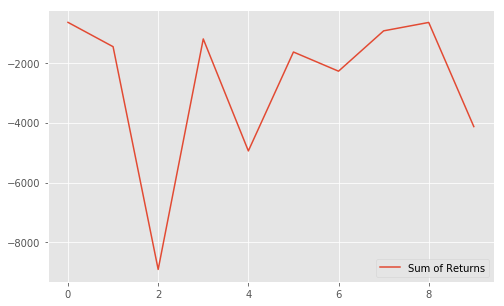

In [53]:
# ALL duplicates dropped here because of issues with data.
dr_data = data.sort_values('trader', ascending=False)
dr_data = dr_data.drop_duplicates(subset='trader')

# Splitting desks into their own groups
s1 = dr_data[dr_data.desk=='S1']
s2 = dr_data[dr_data.desk=='S2']
s3 = dr_data[dr_data.desk=='S3']
s4 = dr_data[dr_data.desk=='S4']
s5 = dr_data[dr_data.desk=='S5']
s6 = dr_data[dr_data.desk=='S6']
s7 = dr_data[dr_data.desk=='S7']
s8 = dr_data[dr_data.desk=='S8']
s9 = dr_data[dr_data.desk=='S9']
s10 = dr_data[dr_data.desk=='S10']

# Now look at the returns of S1, vs the others
net_s1 = s1['net'].sum()
net_s2 = s2['net'].sum()
net_s3 = s3['net'].sum()
net_s4 = s4['net'].sum()
net_s5 = s5['net'].sum()
net_s6 = s6['net'].sum()
net_s7 = s7['net'].sum()
net_s8 = s8['net'].sum()
net_s9 = s9['net'].sum() 
net_s10 = s10['net'].sum()

nets = [['S1', net_s1], ['S2', net_s2], ['S3', net_s3], ['S4', net_s4], ['S5', net_s5], ['S6', net_s6], ['S7', net_s7], ['S8', net_s8], ['S9', net_s9], ['S10', net_s10]]

desk_nets = pd.DataFrame(nets, columns = ['Desk', 'Sum of Returns'])

desk_nets

# Sum of all nets
dr_data['net'].sum()

# Plot of nets for each desk
desk_nets.plot(figsize=(8,5))


# Count of traders per desk
dr_data['desk'].value_counts()

# Male to Female Ratio
dr_data['Gender'].value_counts(normalize=True).sort_index()

## * Every desk lost money/Seems that all of the traders collectively lost money. 
## * S1 lost the least and had the > # of experienced, but also had less traders at its desk.
## * Therefore, this analysis is inconclusive to any conclusion if S1 was any better than the rest.

***

# Volume Weighted Average Price Analysis

## Desk 1 VWAP Analysis

,vwap,price,PVWAP
trader,,,
3A08,20.356805,20.400000,0.043195
3B08,20.337701,20.600000,0.262299
1b 2,20.350033,20.800001,0.449968


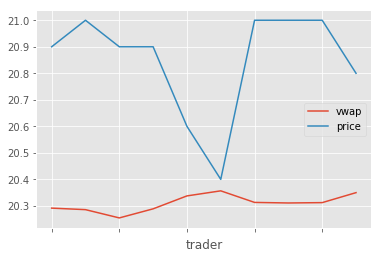

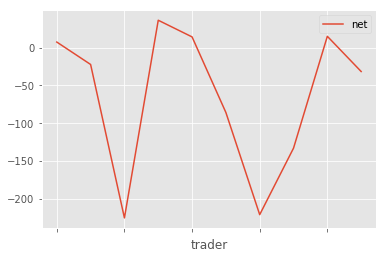

In [102]:
# Desk 1 VWAP - Price

# Pull trader, vwap, price
s1_vp = s1[["trader","vwap","price"]]
s1_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp1_diff = pd.DataFrame(s1_vp,columns= ['vwap','price']) 
vp1_diff['PVWAP'] = vp1_diff['price'] - vp1_diff['vwap']

# Plot price & vwap
s1_vp.plot()

# trader nets from desk
s1_net = s1[["trader","net"]]
s1_net.set_index('trader', inplace=True)
s1_net.plot()

# finding the closest price to vwap
g0_1 = vp1_diff[vp1_diff.PVWAP > 0]
g0_1 = g0_1[g0_1.PVWAP < .5]
g0_1.sort_values('PVWAP', ascending=True)

In [58]:
# Looking at trades from closest to vwap (closest first)
trader_3A08 = s1[s1.trader=='3A08']
trader_3A08['net'] # Loss

trader_3B08 = s1[s1.trader=='3B08']
trader_3B08['net'] # Gain

trader_1b_2 = s1[s1.trader=='1b 2']
trader_1b_2['net'] # Loss

354   -85.799901
Name: net, dtype: float64

353    14.0
Name: net, dtype: float64

357   -31.700065
Name: net, dtype: float64

## Desk 2 VWAP Analysis

,vwap,price,PVWAP
trader,,,
108T,20.294984,20.5,0.205016
1008,20.294291,20.9,0.605709
208T,20.331804,21.0,0.668196
908T,20.319205,21.0,0.680795


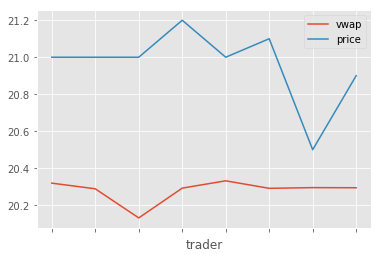

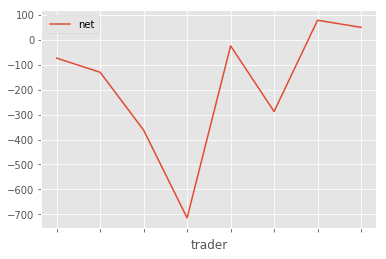

In [103]:
# Desk 2 VWAP - Price

# Pull trader, vwap, price
s2_vp = s2[["trader","vwap","price"]]
s2_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp2_diff = pd.DataFrame(s2_vp,columns= ['vwap','price']) 
vp2_diff['PVWAP'] = vp2_diff['price'] - vp2_diff['vwap']

# Plot price & vwap
s2_vp.plot()

# trader nets from desk
s2_net = s2[["trader","net"]]
s2_net.set_index('trader', inplace=True)
s2_net.plot()

# finding the closest price to vwap
g0_2 = vp2_diff[vp2_diff.PVWAP > 0]
g0_2 = g0_2[g0_2.PVWAP < .7]
g0_2.sort_values('PVWAP', ascending=True)

In [66]:
# Looking at trades from closest to vwap (closest first)
trader_108T = s2[s2.trader=='108T']
trader_108T['net'] # Gain

trader_1008 = s2[s2.trader=='1008']
trader_1008['net'] # Gain

trader_208T = s2[s2.trader=='208T']
trader_208T['net'] # Loss

trader_908T = s2[s2.trader=='908T']
trader_908T['net'] # Loss

116    79.4
Name: net, dtype: float64

120    50.8
Name: net, dtype: float64

107   -23.499995
Name: net, dtype: float64

83   -72.799793
Name: net, dtype: float64

## Desk 3 VWAP Analysis

,vwap,price,PVWAP
trader,,,
2b08,20.086159,20.1,0.013841
11A0,20.270716,20.3,0.029284
10b0,20.300298,20.4,0.099702


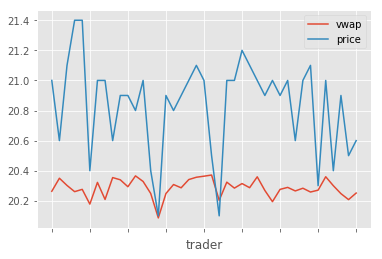

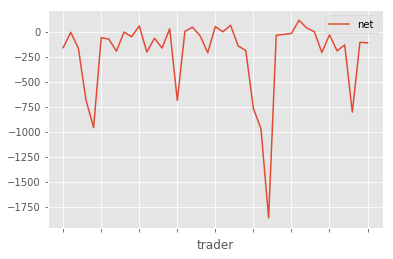

In [104]:
# Desk 3 VWAP - Price

# Pull trader, vwap, price
s3_vp = s3[["trader","vwap","price"]]
s3_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp3_diff = pd.DataFrame(s3_vp,columns= ['vwap','price']) 
vp3_diff['PVWAP'] = vp3_diff['price'] - vp3_diff['vwap']

# Plot price & vwap
s3_vp.plot()

# trader nets from desk
s3_net = s3[["trader","net"]]
s3_net.set_index('trader', inplace=True)
s3_net.plot()

# finding the closest price to vwap
g0_3 = vp3_diff[vp3_diff.PVWAP > 0]
g0_3 = g0_3[g0_3.PVWAP < .1]
g0_3.sort_values('PVWAP', ascending=True)

In [71]:
# Looking at trades from closest to vwap (closest first)
trader_2b08 = s3[s3.trader=='2b08']
trader_2b08['net'] # Gain

trader_11A0 = s3[s3.trader=='11A0']
trader_11A0['net'] # Loss

trader_10b0 = s3[s3.trader=='10b0']
trader_10b0['net'] # Loss

327    29.9
Name: net, dtype: float64

344   -31.1
Name: net, dtype: float64

345   -131.2
Name: net, dtype: float64

## Desk 4 VWAP Analysis

,vwap,price,PVWAP
trader,,,
8a09,20.355984,20.5,0.144016
809T,20.350987,20.5,0.149013
6b09,20.231147,20.4,0.168853
7C09,20.210488,20.4,0.189512
209T,20.309023,20.5,0.190977


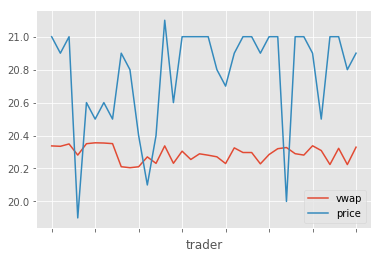

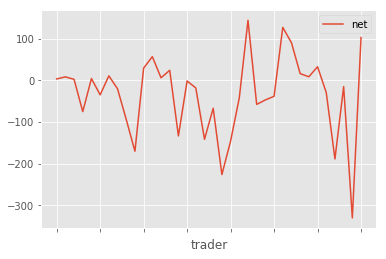

In [75]:
# Desk 4 VWAP - Price

# Pull trader, vwap, price
s4_vp = s4[["trader","vwap","price"]]
s4_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp4_diff = pd.DataFrame(s4_vp,columns= ['vwap','price']) 
vp4_diff['PVWAP'] = vp4_diff['price'] - vp4_diff['vwap']

# Plot price & vwap
s4_vp.plot()

# trader nets from desk
s4_net = s4[["trader","net"]]
s4_net.set_index('trader', inplace=True)
s4_net.plot()

# finding the closest price to vwap
g0_4 = vp4_diff[vp4_diff.PVWAP > 0]
g0_4 = g0_4[g0_4.PVWAP < .2]
g0_4.sort_values('PVWAP', ascending=True)

In [76]:
# Looking at trades from closest to vwap (closest first)
trader_8a09 = s4[s4.trader=='8a09']
trader_8a09['net'] # Loss

trader_809T = s4[s4.trader=='809T']
trader_809T['net'] # Loss

trader_6b09 = s4[s4.trader=='6b09']
trader_6b09['net'] # Gain

trader_7C09 = s4[s4.trader=='7C09']
trader_7C09['net'] # Gain

trader_209T = s4[s4.trader=='209T']
trader_209T['net'] # Loss

293   -34.599965
Name: net, dtype: float64

59   -20.099951
Name: net, dtype: float64

298    6.400297
Name: net, dtype: float64

294    29.60031
Name: net, dtype: float64

65   -29.0
Name: net, dtype: float64

## Desk 5 VWAP Analysis

,vwap,price,PVWAP
trader,,,
3b14,20.329752,20.4,0.070248
214T,20.175811,20.3,0.124189
6B14,20.282093,20.5,0.217907
5b14,20.353553,20.6,0.246447


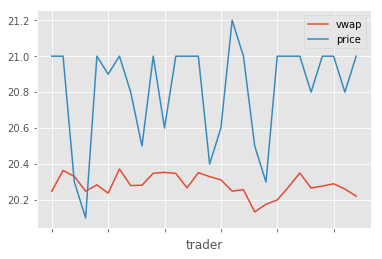

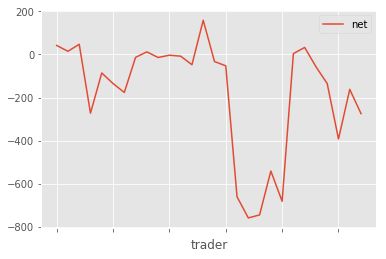

In [79]:
# Desk 5 VWAP - Price

# Pull trader, vwap, price
s5_vp = s5[["trader","vwap","price"]]
s5_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp5_diff = pd.DataFrame(s5_vp,columns= ['vwap','price']) 
vp5_diff['PVWAP'] = vp5_diff['price'] - vp5_diff['vwap']

# Plot price & vwap
s5_vp.plot()

# trader nets from desk
s5_net = s5[["trader","net"]]
s5_net.set_index('trader', inplace=True)
s5_net.plot()

# finding the closest price to vwap
g0_5 = vp5_diff[vp5_diff.PVWAP > 0]
g0_5 = g0_5[g0_5.PVWAP < .25]
g0_5.sort_values('PVWAP', ascending=True)

In [80]:
# Looking at trades from closest to vwap (closest first)
trader_3b14 = s5[s5.trader=='3b14']
trader_3b14['net'] # Loss

trader_214T = s5[s5.trader=='214T']
trader_214T['net'] # Loss

trader_6B14 = s5[s5.trader=='6B14']
trader_6B14['net'] # Gain

trader_5b14 = s5[s5.trader=='5b14']
trader_5b14['net'] # Loss

270   -32.9
Name: net, dtype: float64

52   -541.299925
Name: net, dtype: float64

261    11.89996
Name: net, dtype: float64

264   -3.5
Name: net, dtype: float64

## Desk 6 VWAP Analysis

,vwap,price,PVWAP
trader,,,
2014,20.236094,20.6,0.363906
9a14,20.264769,20.7,0.435231
314T,20.317902,20.8,0.482098


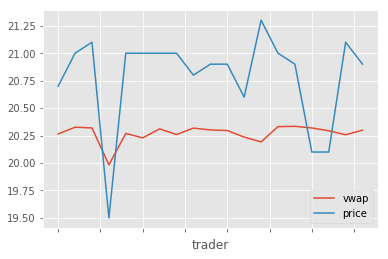

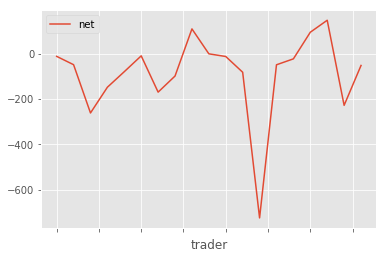

In [82]:
# Desk 6 VWAP - Price

# Pull trader, vwap, price
s6_vp = s6[["trader","vwap","price"]]
s6_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp6_diff = pd.DataFrame(s6_vp,columns= ['vwap','price']) 
vp6_diff['PVWAP'] = vp6_diff['price'] - vp6_diff['vwap']

# Plot price & vwap
s6_vp.plot()

# trader nets from desk
s6_net = s6[["trader","net"]]
s6_net.set_index('trader', inplace=True)
s6_net.plot()

# finding the closest price to vwap
g0_6 = vp6_diff[vp6_diff.PVWAP > 0]
g0_6 = g0_6[g0_6.PVWAP < .5]
g0_6.sort_values('PVWAP', ascending=True)

In [83]:
# Looking at trades from closest to vwap (closest first)
trader_2014 = s6[s6.trader=='2014']
trader_2014['net'] # Loss

trader_9a14 = s6[s6.trader=='9a14']
trader_9a14['net'] # Loss

trader_314T = s6[s6.trader=='314T']
trader_314T['net'] # Gain

38   -81.399688
Name: net, dtype: float64

216   -11.2
Name: net, dtype: float64

36    110.200092
Name: net, dtype: float64

## Desk 7 VWAP Analysis

,vwap,price,PVWAP
trader,,,
1914,20.285638,20.3,0.014362
6a14,20.281124,20.3,0.018876
12b1,20.334069,20.5,0.165931


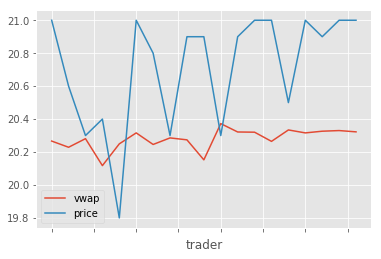

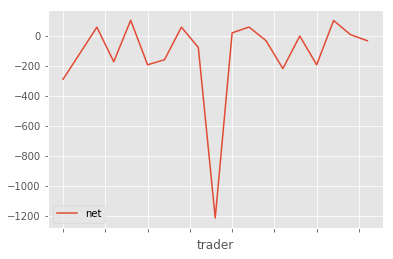

In [84]:
# Desk 7 VWAP - Price

# Pull trader, vwap, price
s7_vp = s7[["trader","vwap","price"]]
s7_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp7_diff = pd.DataFrame(s7_vp,columns= ['vwap','price']) 
vp7_diff['PVWAP'] = vp7_diff['price'] - vp7_diff['vwap']

# Plot price & vwap
s7_vp.plot()

# trader nets from desk
s7_net = s7[["trader","net"]]
s7_net.set_index('trader', inplace=True)
s7_net.plot()

# finding the closest price to vwap
g0_7 = vp7_diff[vp7_diff.PVWAP > 0]
g0_7 = g0_7[g0_7.PVWAP < .2]
g0_7.sort_values('PVWAP', ascending=True)

In [85]:
# Looking at trades from closest to vwap (closest first)
trader_1914 = s7[s7.trader=='1914']
trader_1914['net'] # Gain

trader_6a14 = s7[s7.trader=='6a14']
trader_6a14['net'] # Gain

trader_12b1 = s7[s7.trader=='12b1']
trader_12b1['net'] # Small Loss

18    58.60005
Name: net, dtype: float64

191    58.50006
Name: net, dtype: float64

211   -0.69979
Name: net, dtype: float64

## Desk 8 VWAP Analysis

,vwap,price,PVWAP
trader,,,
4b15,20.177148,20.5,0.322852
2a15,20.371701,20.7,0.328299
4a15,20.237757,20.6,0.362243
3A15,20.235642,20.6,0.364358


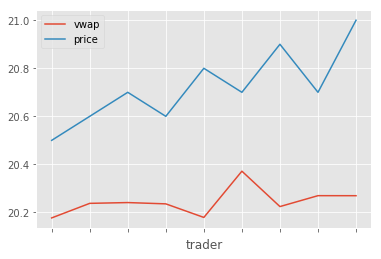

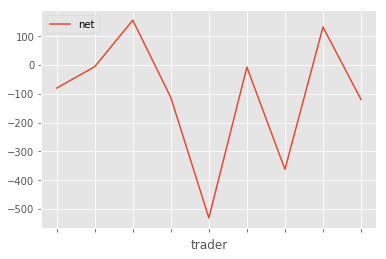

In [88]:
# Desk 8 VWAP - Price

# Pull trader, vwap, price
s8_vp = s8[["trader","vwap","price"]]
s8_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp8_diff = pd.DataFrame(s8_vp,columns= ['vwap','price']) 
vp8_diff['PVWAP'] = vp8_diff['price'] - vp8_diff['vwap']

# Plot price & vwap
s8_vp.plot()

# trader nets from desk
s8_net = s8[["trader","net"]]
s8_net.set_index('trader', inplace=True)
s8_net.plot()

# finding the closest price to vwap
g0_8 = vp8_diff[vp8_diff.PVWAP > 0]
g0_8 = g0_8[g0_8.PVWAP < .4]
g0_8.sort_values('PVWAP', ascending=True)

In [89]:
# Looking at trades from closest to vwap (closest first)
trader_4b15 = s8[s8.trader=='4b15']
trader_4b15['net'] # Loss

trader_2a15 = s8[s8.trader=='2a15']
trader_2a15['net'] # Loss

trader_4a15 = s8[s8.trader=='4a15']
trader_4a15['net'] # Loss

trader_3A15 = s8[s8.trader=='3A15']
trader_3A15['net'] # Loss

173   -80.09982
Name: net, dtype: float64

178   -7.2
Name: net, dtype: float64

174   -5.599976
Name: net, dtype: float64

176   -112.499848
Name: net, dtype: float64

## Desk 9 VWAP Analysis

,vwap,price,PVWAP
trader,,,
1115,20.352569,20.6,0.247431
1015,20.353596,20.7,0.346404
1215,20.371220,20.9,0.528780
15a1,20.304506,20.9,0.595494


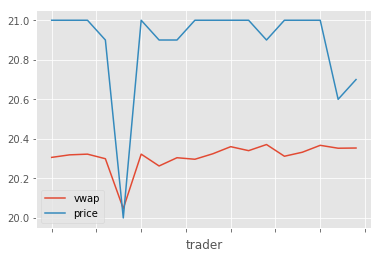

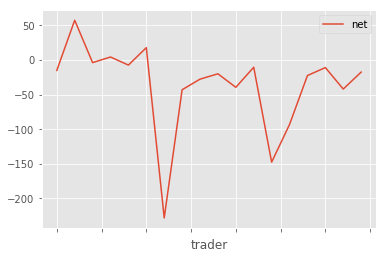

In [95]:
# Desk 9 VWAP - Price

# Pull trader, vwap, price
s9_vp = s9[["trader","vwap","price"]]
s9_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp9_diff = pd.DataFrame(s9_vp,columns= ['vwap','price']) 
vp9_diff['PVWAP'] = vp9_diff['price'] - vp9_diff['vwap']

# Plot price & vwap
s9_vp.plot()

# trader nets from desk
s9_net = s9[["trader","net"]]
s9_net.set_index('trader', inplace=True)
s9_net.plot()

# finding the closest price to vwap
g0_9 = vp9_diff[vp9_diff.PVWAP > 0]
g0_9 = g0_9[g0_9.PVWAP < .6]
g0_9.sort_values('PVWAP', ascending=True)

In [96]:
# Looking at trades from closest to vwap
trader_1115 = s9[s9.trader=='1115']
trader_1115['net'] # Loss

trader_1015 = s9[s9.trader=='1015']
trader_1015['net'] # Loss

trader_1215 = s9[s9.trader=='1215']
trader_1215['net'] # Loss

trader_15a1 = s9[s9.trader=='15a1']
trader_15a1['net'] # Loss

8   -41.999975
Name: net, dtype: float64

9   -17.5
Name: net, dtype: float64

6   -147.599906
Name: net, dtype: float64

164   -42.999985
Name: net, dtype: float64

## Desk 10 VWAP Analysis

,vwap,price,PVWAP
trader,,,
2A1,19.984423,20.0,0.015577
12b,20.336606,20.4,0.063394
12a,20.311624,20.4,0.088376


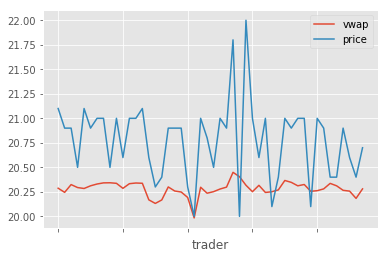

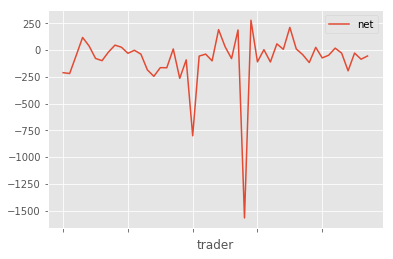

In [98]:
# Desk 10 VWAP - Price

# Pull trader, vwap, price
s10_vp = s10[["trader","vwap","price"]]
s10_vp.set_index('trader', inplace=True)

# subtract and store price - vwap as PVWAP
vp10_diff = pd.DataFrame(s10_vp,columns= ['vwap','price']) 
vp10_diff['PVWAP'] = vp10_diff['price'] - vp10_diff['vwap']

# Plot price & vwap
s10_vp.plot()

# trader nets from desk
s10_net = s10[["trader","net"]]
s10_net.set_index('trader', inplace=True)
s10_net.plot()

# finding the closest price to vwap
g0_10 = vp10_diff[vp10_diff.PVWAP > 0]
g0_10 = g0_10[g0_10.PVWAP < .1]
g0_10.sort_values('PVWAP', ascending=True)

In [99]:
# Looking at trades from closest to vwap
trader_2A1 = s10[s10.trader=='2A1']
trader_2A1['net'] # Loss

trader_12b= s10[s10.trader=='12b']
trader_12b['net'] # Gain

trader_12a = s10[s10.trader=='12a']
trader_12a['net'] # Loss

373   -56.1
Name: net, dtype: float64

388    18.29995
Name: net, dtype: float64

389   -28.40005
Name: net, dtype: float64

# Results
## * Net's were pretty evenly split (Gain | Loss)
## * No real signs from the analysis that any particular VWAP strategy was being followed
## * Some traders did really well when they purchased just above the VWAP, or using it as a support, while others did not perform well

***
# Best Traders Analysis | Top 5 traders by 'net'

In [119]:
best_net = dr_data[dr_data.net > 156].sort_values('net', ascending=False) # Top 5
best_net['net']
best_net['desk']
best_net['trader']
best_net

142    279.000000
137    212.199886
135    191.200000
378    188.199931
50     158.799898
Name: net, dtype: float64

142    S10
137    S10
135    S10
378    S10
50      S5
Name: desk, dtype: object

142      17
137     151
135     215
378     17b
50     414T
Name: trader, dtype: object

,ido,price,realizedtot,unrealq,uservolu,useroftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,...,uservoltradedbuysell,Gender,Q2,Q9,Q12,Q14,Q15,Q30,desk,trader
142,S 10C17,22.0,-3835.00000,187,367,0.534207,687,15,312,75,...,367,F,4,4,2,4,4,N,S10,17
137,S10C151,21.0,-11694.80011,567,1625,0.423508,3837,75,3944,1040,...,1625,M,2,2,3,2,2,N,S10,151
135,S10C215,20.5,4106.70000,-191,1977,0.550083,3594,65,1762,942,...,1977,M,2,3,2,3,2,Y,S10,215
378,S10C17b,21.8,-28784.00007,1329,3659,0.701495,5216,160,788,148,...,3659,F,2,2,2,3,1,Y,S10,17b
50,S5C414T,21.0,-12105.20010,584,1386,0.406929,3406,88,1240,155,...,1386,F,2,3,2,1,1,N,S5,414T


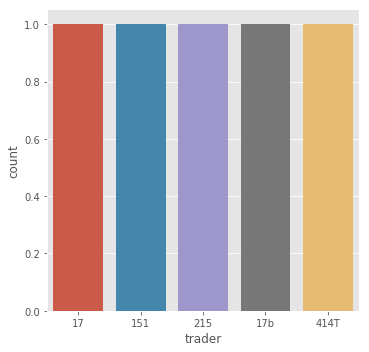

In [120]:
sns.catplot(x='trader',kind='count',data=best_net)
# Flat across the board; no duplicates slipped through

In [279]:
best_traders = best_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender']]
best_traders

best_traders['Gender']

meta_dict['Q2']
meta_dict['Q9']
meta_dict['Q12']
meta_dict['Q14']
meta_dict['Q15']
meta_dict['Q30']

best_survey = best_net[['Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]
best_survey

best_all = best_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender',
                    'Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]

,trader,net,uservolu,useroftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,lasthourvolu,lasthouruservolu,price,vwap,Gender
142,17,279.000000,367,0.534207,687,15,312,75,510,231,22.0,20.317467,F
137,151,212.199886,1625,0.423508,3837,75,3944,1040,1018,104,21.0,20.366172,M
135,215,191.200000,1977,0.550083,3594,65,1762,942,2616,668,20.5,20.252337,M
378,17b,188.199931,3659,0.701495,5216,160,788,148,3490,1031,21.8,20.449118,F
50,414T,158.799898,1386,0.406929,3406,88,1240,155,2418,546,21.0,20.351644,F


142    F
137    M
135    M
378    F
50     F
Name: Gender, dtype: object

'I traded using ALL of the information provided to me at each stage'

'I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information'

'The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions'

'The medium (news /blog /video/ tool based) of information impacted my trading decisions'

'I believe that more stock specific information could have helped me to increase my net profits'

'I have had prior experience in live trading stock /shares'

,Q2,Q9,Q12,Q14,Q15,Q30
142,4,4,2,4,4,N
137,2,2,3,2,2,N
135,2,3,2,3,2,Y
378,2,2,2,3,1,Y
50,2,3,2,1,1,N


In [ ]:
# Survey shows that the best trader had no trade experience. She disagreed to all questions besides using a reputable news source for her trade decision.
# The second best also had no trade experience. He agreed with all Q's, except was neutral on using a rep source for trade decisions.
# The third best had trading experience and agreed to 2, 12, and 15, and was neutral on 9 and 14.
# Fourth also had trade experience and agreed to Qs 2, 9 and 12. Neutral on 14 and strongly agreed to Q15.
# Fifth did not have experience. She agreed to 2 and 12. Neutral on 9 and strongly agreed to 14 and 15.

In [249]:
import numpy as np
import matplotlib.pyplot as plt

# Separated
bt_net = best_traders[['trader', 'net']]
bt_uservol = best_traders[['trader', 'uservolu']]
bt_usertotvol = best_traders[['trader', 'useroftotalvolu']]
bt_totvol = best_traders[['trader', 'totalvolu']]
bt_trdcnt = best_traders[['trader', 'tradecount']]
bt_frsthrvol = best_traders[['trader', 'firsthourvolu']]
bt_frsthruservol = best_traders[['trader', 'firsthouruservolu']]
bt_lsthrvol = best_traders[['trader', 'lasthourvolu']]
bt_lsthruservol = best_traders[['trader', 'lasthouruservolu']]
bt_price = best_traders[['trader', 'price']]
bt_vwap = best_traders[['trader', 'vwap']]
bt_gender = best_traders[['trader', 'Gender']]

# remove count
bt_net.set_index('trader', inplace=True)
bt_uservol.set_index('trader', inplace=True)
bt_usertotvol.set_index('trader', inplace=True)
bt_totvol.set_index('trader', inplace=True)
bt_trdcnt.set_index('trader', inplace=True)
bt_frsthrvol.set_index('trader', inplace=True)
bt_frsthruservol.set_index('trader', inplace=True)
bt_lsthrvol.set_index('trader', inplace=True)
bt_lsthruservol.set_index('trader', inplace=True)
bt_price.set_index('trader', inplace=True)
bt_vwap.set_index('trader', inplace=True)
bt_gender.set_index('trader', inplace=True)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Best Net')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Net')

Text(0.5, 1.0, 'Best User Volume and Total Volume')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Best First Hr Vol vs Last Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Best First Hr User Vol vs Last User Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

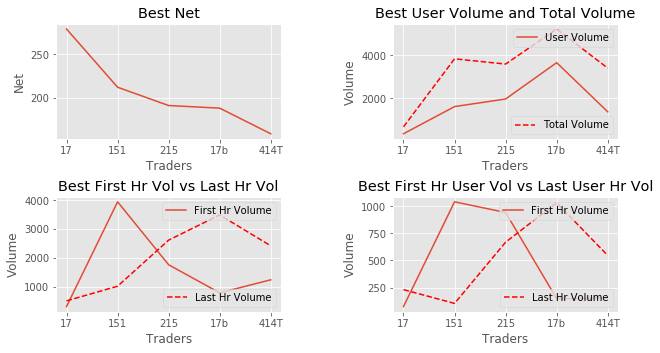

In [337]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
# Plots

# plot with various axes scales
plt.figure(1)

# Net
plt.subplot(221)
plt.plot(bt_net,'-')
plt.title('Best Net')
plt.xlabel('Traders')
plt.ylabel('Net')
plt.grid(True)

# User Volume and Total Volume
plt.subplot(222)
#######
line11, = plt.plot(bt_uservol, '-', label="User Volume")
line21, = plt.plot(bt_totvol, 'r--', label="Total Volume")
# Create a legend for the first line.
fourth_legend = plt.legend(handles=[line11], loc=1)
# Add the legend manually to the current Axes.
ax11 = plt.gca().add_artist(fourth_legend)
# Create another legend for the second line.
plt.legend(handles=[line21], loc=4)
#######
plt.title('Best User Volume and Total Volume')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)

# First Hr Vol vs Last Hr Vol
plt.subplot(223)
#########
line31, = plt.plot(bt_frsthrvol, '-', label="First Hr Volume")
line41, = plt.plot(bt_lsthrvol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
fifth_legend = plt.legend(handles=[line31], loc=1)
# Add the legend manually to the current Axes.
ax21 = plt.gca().add_artist(fifth_legend)
# Create another legend for the second line.
plt.legend(handles=[line41], loc=4)
##########
plt.title('Best First Hr Vol vs Last Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)

# First and Last hr User Vol
plt.subplot(224)
#########
line51, = plt.plot(bt_frsthruservol, '-', label="First Hr Volume")
line61, = plt.plot(bt_lsthruservol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
six_legend = plt.legend(handles=[line51], loc=1)
# Add the legend manually to the current Axes.
ax31 = plt.gca().add_artist(six_legend)
# Create another legend for the second line.
plt.legend(handles=[line61], loc=4)
##########
plt.title('Best First Hr User Vol vs Last User Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True) 

plt.subplots_adjust(top=12, bottom=11, left=0.10, right=1.4, hspace=.5,
                    wspace=.5)


plt.show()

In [ ]:
# Those that traded in the first hour tended to do better.
# Top traders traded less than the rest of the traders
# Mixed Result, about half traded in the first hour while other half traded in last hour.
# Same result for top traders (users), half traded in AM & half in PM

### Top 5 Survey Analysis

In [277]:
bt_q2 = best_all[['trader', 'Q2']]
bt_q9 = best_all[['trader', 'Q9']]
bt_q12 = best_all[['trader', 'Q12']]
bt_q14 = best_all[['trader', 'Q14']]
bt_q15 = best_all[['trader', 'Q15']]
bt_q30 = best_all[['trader', 'Q30']]

bt_q2.set_index('trader', inplace=True)
bt_q9.set_index('trader', inplace=True)
bt_q12.set_index('trader', inplace=True)
bt_q14.set_index('trader', inplace=True)
bt_q15.set_index('trader', inplace=True)
bt_q30.set_index('trader', inplace=True)

# Could not get these to plot **

***
# Worst Traders Analysis | Last 3 traders by 'net'

In [297]:
worst_net = dr_data[dr_data.net < -1000].sort_values('net', ascending=True) # Worst 5
worst_net['net']
worst_net['desk']
worst_net['trader']
worst_net

80    -1861.500000
379   -1568.700087
205   -1213.299985
Name: net, dtype: float64

80      S3
379    S10
205     S7
Name: desk, dtype: object

80     1508
379     17a
205    16b1
Name: trader, dtype: object

,ido,price,realizedtot,unrealq,uservolu,useroftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,...,uservoltradedbuysell,Gender,Q2,Q9,Q12,Q14,Q15,Q30,desk,trader
80,S3C1508,21.0,5425.50000,-347,5681,0.728333,7800,321,1688,450,...,5681,M,3,2,2,4,2,N,S3,1508
379,S10C17a,20.0,-22128.70009,1028,5204,0.684647,7601,214,3924,1450,...,5204,F,3,2,3,2,2,N,S10,17a
205,S7C16b1,20.9,22403.70002,-1130,1490,0.366544,4065,92,978,110,...,1490,M,3,5,1,1,1,N,S7,16b1


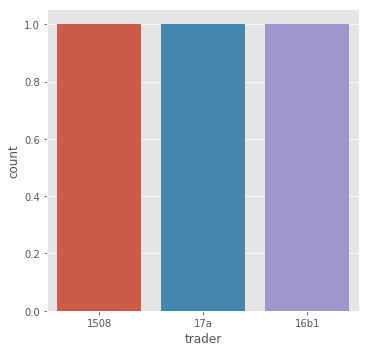

In [298]:
sns.catplot(x='trader',kind='count',data=worst_net)
# Flat across the board; no duplicates slipped through

In [299]:
worst_traders = worst_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender']]
worst_traders

worst_traders['Gender']

meta_dict['Q2']
meta_dict['Q9']
meta_dict['Q12']
meta_dict['Q14']
meta_dict['Q15']
meta_dict['Q30']

worst_survey = worst_net[['Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]
worst_survey

worst_all = worst_net[['trader','net', 'uservolu','useroftotalvolu','totalvolu',
                   'tradecount','firsthourvolu','firsthouruservolu',
                   'lasthourvolu','lasthouruservolu', 'price','vwap','Gender',
                    'Q2', 'Q9', 'Q12', 'Q14', 'Q15', 'Q30']]

,trader,net,uservolu,useroftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,lasthourvolu,lasthouruservolu,price,vwap,Gender
80,1508,-1861.500000,5681,0.728333,7800,321,1688,450,8474,3200,21.0,20.359308,M
379,17a,-1568.700087,5204,0.684647,7601,214,3924,1450,5684,1965,20.0,20.404973,F
205,16b1,-1213.299985,1490,0.366544,4065,92,978,110,3118,480,20.9,20.152522,M


80     M
379    F
205    M
Name: Gender, dtype: object

'I traded using ALL of the information provided to me at each stage'

'I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information'

'The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions'

'The medium (news /blog /video/ tool based) of information impacted my trading decisions'

'I believe that more stock specific information could have helped me to increase my net profits'

'I have had prior experience in live trading stock /shares'

,Q2,Q9,Q12,Q14,Q15,Q30
80,3,2,2,4,2,N
379,3,2,3,2,2,N
205,3,5,1,1,1,N


In [300]:
# All were neutral on using ALL info provided.
# The 2 worst agree that more info would have helped them. The 3rd from worst strongly disagreed with that.
# High rep news sources impacted the worst and third from worst's trade decisions. 2nd worst was neutral.
# news did not have an imact on the worst traders decisions. It did on the 2nd and 3rd worst, 3rd worst strongly agreed.
# All agreed that mroe stock specific info would have helped them, 3rd worst strongly agreed.
# All had no experience trading stocks.

In [301]:
# Separated
wt_net = worst_traders[['trader', 'net']]
wt_uservol = worst_traders[['trader', 'uservolu']]
wt_usertotvol = worst_traders[['trader', 'useroftotalvolu']]
wt_totvol = worst_traders[['trader', 'totalvolu']]
wt_trdcnt = worst_traders[['trader', 'tradecount']]
wt_frsthrvol = worst_traders[['trader', 'firsthourvolu']]
wt_frsthruservol = worst_traders[['trader', 'firsthouruservolu']]
wt_lsthrvol = worst_traders[['trader', 'lasthourvolu']]
wt_lsthruservol = worst_traders[['trader', 'lasthouruservolu']]
wt_price = worst_traders[['trader', 'price']]
wt_vwap = worst_traders[['trader', 'vwap']]
wt_gender = worst_traders[['trader', 'Gender']]

# remove count
wt_net.set_index('trader', inplace=True)
wt_uservol.set_index('trader', inplace=True)
wt_usertotvol.set_index('trader', inplace=True)
wt_totvol.set_index('trader', inplace=True)
wt_trdcnt.set_index('trader', inplace=True)
wt_frsthrvol.set_index('trader', inplace=True)
wt_frsthruservol.set_index('trader', inplace=True)
wt_lsthrvol.set_index('trader', inplace=True)
wt_lsthruservol.set_index('trader', inplace=True)
wt_price.set_index('trader', inplace=True)
wt_vwap.set_index('trader', inplace=True)
wt_gender.set_index('trader', inplace=True)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Worst Net')

Text(0.5, 1.0, 'Worst Net')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Net')

Text(0.5, 1.0, 'Worst User Volume and Total Volume')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Worst First Hr Vol vs Last Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

Text(0.5, 1.0, 'Worst First Hr User Vol vs Last User Hr Vol')

Text(0.5, 0, 'Traders')

Text(0, 0.5, 'Volume')

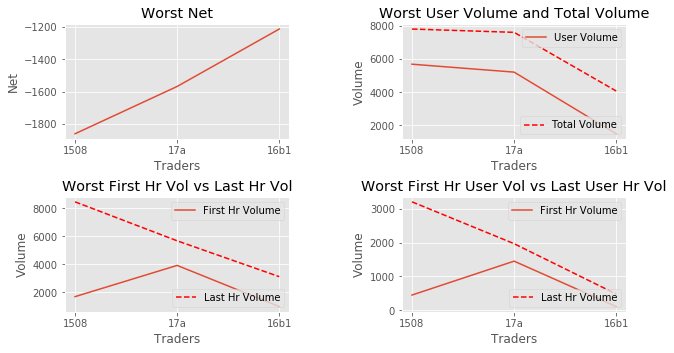

In [338]:
# Plots

# plot with various axes scales

plt.figure(1)
plt.title('Worst Net')

# Net
plt.subplot(221)
plt.plot(wt_net,'-')
plt.title('Worst Net')
plt.xlabel('Traders')
plt.ylabel('Net')
plt.grid(True)
# Those that traded in the first hour tended to do better.


# User Volume and Total Volume
plt.subplot(222)
#######
line1, = plt.plot(wt_uservol, '-', label="User Volume")
line2, = plt.plot(wt_totvol, 'r--', label="Total Volume")
# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)
#######
plt.title('Worst User Volume and Total Volume')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)
# Top traders traded less than the rest of the traders


# First Hr Vol vs Last Hr Vol
plt.subplot(223)
#########
line3, = plt.plot(wt_frsthrvol, '-', label="First Hr Volume")
line4, = plt.plot(wt_lsthrvol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
second_legend = plt.legend(handles=[line3], loc=1)
# Add the legend manually to the current Axes.
ax2 = plt.gca().add_artist(second_legend)
# Create another legend for the second line.
plt.legend(handles=[line4], loc=4)
##########
plt.title('Worst First Hr Vol vs Last Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True)
# Mixed Result, about half traded in the first hour while other half traded in last hour.



# First and Last hr User Vol
plt.subplot(224)
#########
line5, = plt.plot(wt_frsthruservol, '-', label="First Hr Volume")
line6, = plt.plot(wt_lsthruservol, 'r--', label="Last Hr Volume")
# Create a legend for the first line.
third_legend = plt.legend(handles=[line5], loc=1)
# Add the legend manually to the current Axes.
ax3 = plt.gca().add_artist(third_legend)
# Create another legend for the second line.
plt.legend(handles=[line6], loc=4)
##########
plt.title('Worst First Hr User Vol vs Last User Hr Vol')
plt.xlabel('Traders')
plt.ylabel('Volume')
plt.grid(True) 
# Same result for top traders (users), half traded in AM & half in PM

plt.subplots_adjust(top=12, bottom=11, left=0.10, right=1.4, hspace=.5,
                    wspace=.5)

plt.show()

In [ ]:
# Trader 1508 traded in the PM and did the worst.
# 16b1 traded in the first hour and did the least worst.
# All traded less than the rest of the traders.
# All traded more in the first and last hour than the rest.